In [1]:
import zipfile
do_extract = False

if do_extract:
    zip_ref = zipfile.ZipFile('./data.zip', 'r')
    zip_ref.extractall('./')
    zip_ref.close()

In [2]:
import csv
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = './data/'
def get_filenames(data_path, log_name):
    lines = []
    with open(data_path + log_name, 'r') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
        print('%s Dataset has %d data' % (log_name, len(lines)))
        return lines

def get_steering_angles(lines):
    measurements = []
    for line in lines:
        measurements.append(float(line[3]))
    return measurements

def show_distribution(measurements):
    pd_data = pd.DataFrame(measurements)
    pd_data.plot.hist(bins=100)

driving_log.csv Dataset has 8036 data


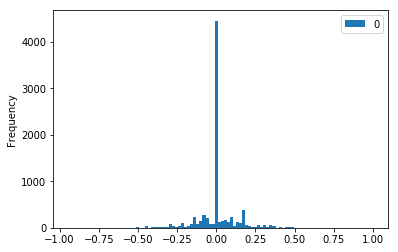

In [4]:
lines = get_filenames(data_path, 'driving_log.csv')
center_steering_angles = get_steering_angles(lines)
show_distribution(center_steering_angles)

In [5]:
def show_image(image):
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title('BGR image')
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2YUV))
    plt.title('YUV image')
    plt.yticks([])
    plt.xticks([])
    
    plt.subplot(1,3,3)
    plt.imshow(image[55:135, :])
    plt.title('crop image')
    plt.yticks([])
    plt.xticks([])

IMG/center_2016_12_01_13_30_48_287.jpg


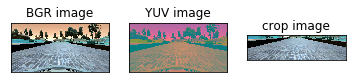

In [6]:
image_path = lines[0][0]
print(image_path)
image = cv2.imread(data_path + image_path)
show_image(image)

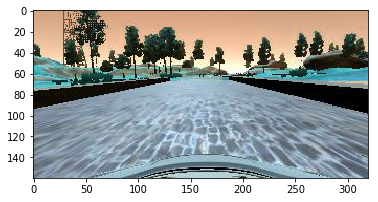

In [14]:
image_flip = cv2.flip(image,1)
plt.figure()
plt.imshow(image_flip)

In [20]:
def trans_image(image, steer):
    """ Returns translated image and 
    corrsponding steering angle.
    """
    trans_range = 100
    tr_x = trans_range * np.random.uniform() - trans_range / 2
    steer_ang = steer + tr_x / trans_range * 2 * .2
    tr_y = 0
    M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])
    image_tr = cv2.warpAffine(image, M, (320,160))
    return image_tr, steer_ang

In [21]:
steer = float(lines[0][3])

In [22]:
print(steer)

0.0


In [24]:
(image_trans, steer_trans) = trans_image(image, steer)

In [25]:
print(steer_trans)

0.11038672066256124


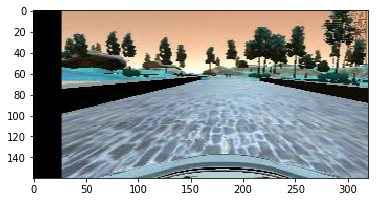

In [26]:
plt.figure()
plt.imshow(image_trans)